# Implementação de marca d'água via SVD

**Autores:**

* João Ricardo de Almeida Lustosa - N°USP: 15463697

* Juan Henriques Passos - N°USP: 15464826

**Disciplina:** SME0142 - Álgebra Linear e Aplicações

---

## 1. Introdução:
Nesse trabalho apresentamos uma implementação prática de **Marca d'água digital (_Digital Watermarking_)** utilizando **Decomposição de Valores Singulares (SVD)**.

O objetivo é marcar um imagem principal (hospedeira) com uma imagem secundária (marca d'agua) oculta, de forma imperceptível. Esse método é muito utilizado para proteção de direitos autorais.

Para ser eficaz, um sistema de marca d'água deve atender a três requisitos fundamentais:
* **Invisibilidade:** A marca não deve causar distorção perceptível na imagem original.
* **Robustez:** A marca deve resistir a ataques intencionais ou processamentos comuns (como compressão e filtragem).
* **Capacidade:** Quantidade de dados que podem ser inseridos.

## 2. Fundamentação Teórica:

Imagine que uma imagem pode ser entendida como uma tabela de números, ou seja, uma matriz, em que cada número representa a intensidade dos pixel da imagem.

**Metodologia:** Para a marcação da imagem, em vez de alterar diretamente os pixels da imagem, utilizamos os valores singulares, extraidos via SVD, o que minimiza distorções na imagem marcada, trazendo um resultado mais satisfatório.

## 3. Estrutura do Notebook:
O código está dividido em duas etapas principais:
1.  **Teoria da Decomposição em Valores Singulares:** Explicar a técnica utilizada pela aplicação de marca d'água.
2.  **Embedding (Inserção):** Onde a marca é inserida matematicamente na imagem original.
3.  **Extraction (Extração):** Onde realizamos a engenharia reversa para recuperar a marca d'água (utilizando o método "não-cego", que requer a imagem original).

---

# 1. Teoria da Decomposição em Valores Singulares
## 1.1 Decomposição em Valores Singulares
A decomposição em valores singulares (SVD) é uma técnica de álgebra linear que
decompõe uma matriz dada em três matrizes componentes: 
1. Os vetores singulares à esquerda; 
2. Um conjunto de valores singulares;
3. Os vetores singulares à direita. 

As duas matrizes que são compostas por vetores singulares fornecem informações sobre a estrutura da
matriz original. Os valores singulares descrevem a intensidade dos componentes dados da
matriz original. O teorema da SVD afirma que, dada uma matriz M, então
existe uma decomposição de M tal que A = USV.

$$
\underbrace{
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix}
}_{A \ (m \times n)}
=
\underbrace{
\begin{bmatrix}
u_{11} & u_{12} & \cdots & u_{1m} \\
u_{21} & u_{22} & \cdots & u_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
u_{m1} & u_{m2} & \cdots & u_{mm}
\end{bmatrix}
}_{U \ (m \times m)}
\times
\underbrace{
\begin{bmatrix}
s_{1} & 0 & \cdots & 0 \\
0 & s_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 0
\end{bmatrix}
}_{S \ (m \times n)}
\times
\underbrace{
\begin{bmatrix}
v_{11} & v_{12} & \cdots & v_{1n} \\
v_{21} & v_{22} & \cdots & v_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
v_{n1} & v_{n2} & \cdots & v_{nn}
\end{bmatrix}
}_{V^T \ (n \times n)}
$$

**Onde:**
* $A$: Matriz de dados (imagem).
* $U$: Matriz ortogonal esquerda (estrutura das linhas).
* $S$: Matriz diagonal contendo os valores singulares $s_i$ (intensidade), onde $s_1 \geq s_2 \geq \dots \geq 0$. Os elementos fora da diagonal principal são **zero**.
* $V^T$: Matriz ortogonal direita transposta (estrutura das colunas).

## 1.2 Marca d'água por decomposição de valores singulares

A marca d'água SVD foi projetada para funcionar em binário. Para uma imagem de $N \times N$ pixels e uma marca d'água binária de $p \times p$ pixels, a imagem é dividida em (N/4) blocos não sobrepostos, cujo tamanho é de 4 pixels. Isso é baseado na decisão das posições dos blocos incorporados para cada bit da marca d'água. O procedimento de incorporação da marca d'água é mostrado nesta figura.

![Fluxograma](Fluxograma.png)

**Figura 1:** Procedimento de incorporação da marca d'água.

Usando SVD em diferentes blocos da imagem, para cada matriz $S_j$ gerada de cada bloco $B_j$, onde $1 \leq j \leq \left( \frac{N}{4} \right) \times \left( \frac{N}{4} \right)$, como abaixo, define-se $s_3$ como igual a $s_2$ e $s_2$ como igual a $s_2 + \alpha \times w_i$ para incorporar o valor binário da marca d'água, onde $\alpha$ é uma constante e $w_i$ é o bit da marca d'água. Cada matriz $S_j$ de um bloco $B_j$ contém o valor da marca d'água. Após incorporar a marca d'água na matriz $s_j$ do bloco $B_j$, o bloco incorporado é obtido invertendo seus U e V correspondentes.
A marca d'água proposta pode ser dividida em dois procedimentos: incorporação e extração e restauração.

In [8]:
import cv2
from google.colab.patches import cv2_imshow

# 1. Carregar imagens em tons de cinza (0)
host = cv2.imread('photographer.jpg', 0)
watermark = cv2.imread('lock.jpg', 0)

print('1 - Imagem Hospedeira Original')
cv2_imshow(host)
print()
print('2 - Marca d\'água Original')
cv2_imshow(watermark)

ModuleNotFoundError: No module named 'google'

# 1. Inserção da marca d'água

Nesta etapa iremos embutir a marca d'água sobre uma imagem hospedeira. Para isso, usaremos a **Decomposição em Valores Singulares (SVD)** na Imagem hospedeira, para garantir e imperceptibilidade.

### Funcionameto:

O algoritmo separa a imagem original em blocos menores de nxn pixels. Para cada bloco realizaremos as seguintes etapas:

1.  **Decomposição:** O SVD é aplicado ao bloco da imagem, separando-o em três matrizes $A = U \ \Sigma \ V^T$
    
    $U$ : Representa os padrões verticais da imagem
    
    $\Sigma$ : Matriz formada pelos valores singulares

    $V^T$ : Representa os padrões horizontais da imagem

    **Obs:** Esses valores singulares presentes em $\Sigma$, nos dirão o quanto cada padrão é relevante para a imagem. Matematicamente, o $\Sigma$ carrega os autovalores não negativos, em que valores singulares mais altos carregam mais energia.

2.  **Modificação:** Alteramos os valores singulares da imagem original, inserindo pixels da marca d'água ($W$), controlada por um fator de força ($\alpha$).

    $$\Sigma_{marcado} = \Sigma_{original} + (\alpha \cdot W)$$

3.  **Reconstrução:** Utilizando os novos valores singulares, recalculamos o bloco da imagem.

    $$A_{marcado} = U \ \Sigma_{marcado} \ V^T$$

**Parâmetros Importantes:**
* `alpha`: Define a intensidade da marca. Valores baixos (ex: 0.05) tornam a marca invisível, mas mais difícil de extrair. Valores altos aumentam a robustez, mas podem distorcer a imagem original.
* `block_size`: O tamanho da janela de processamento. Blocos menores preservam melhor a qualidade visual local.



Iniciando embedding SVD em blocos de 4x4...
Embedding em blocos concluído.
3 - Imagem com Marca d'água


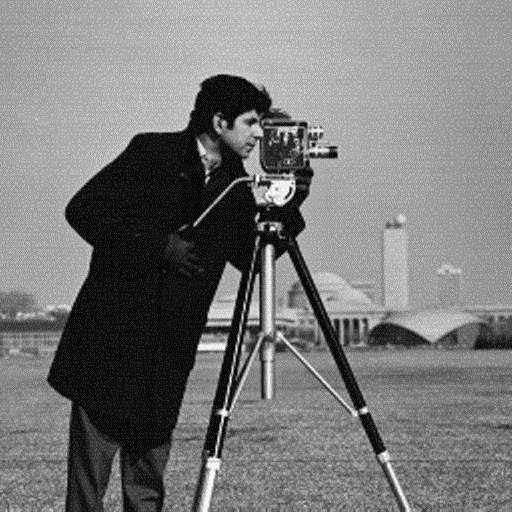

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def embed_svd(host_image, watermark_image, alpha, block_size=8):
    """
    Embute uma marca d'água modificando o maior valor singular de cada bloco da imagem hospedeira.
    
    Mapeamento:
    - O pixel (i, j) da marca d'água é embutido no bloco (i, j) da imagem hospedeira.
    - Fórmula: S_bloco[0] = S_bloco[0] + (alpha * pixel_marca)
    """
    
    # 1. Validações de dimensão
    h_rows, h_cols = host_image.shape
    w_rows, w_cols = watermark_image.shape
    
    if h_rows % block_size != 0 or h_cols % block_size != 0:
        raise ValueError("A imagem hospedeira deve ser divisível pelo tamanho do bloco.")
        
    expected_w_rows = h_rows // block_size
    expected_w_cols = h_cols // block_size
    
    if w_rows != expected_w_rows or w_cols != expected_w_cols:
        # Redimensiona a marca se não bater com a grade de blocos (segurança)
        print(f"Aviso: Redimensionando marca de {w_rows}x{w_cols} para {expected_w_rows}x{expected_w_cols}")
        watermark_image = cv2.resize(watermark_image, (expected_w_cols, expected_w_rows))

    print(f"Iniciando embedding: Host {host_image.shape} | Marca {watermark_image.shape} | Blocos {block_size}x{block_size}")

    # Converter para float
    host_f = host_image.astype(np.float32)
    watermark_f = watermark_image.astype(np.float32)
    
    watermarked_image = np.copy(host_f)
    
    # 2. Iterar sobre a grade de blocos
    # i e j representam os índices da MARCA (0 a 63)
    # r e c representam os índices de pixel da HOSPEDEIRA (0 a 512)
    for i in range(watermark_image.shape[0]):
        for j in range(watermark_image.shape[1]):
            
            # Coordenadas do bloco na imagem hospedeira
            r = i * block_size
            c = j * block_size
            r_end = r + block_size
            c_end = c + block_size
            
            # Extrair o bloco
            block = host_f[r:r_end, c:c_end]
            
            # Aplicar SVD no bloco
            # U: Matriz unitária esquerda
            # S: Vetor de valores singulares (diagonal)
            # Vt: Transposta da matriz unitária direita
            try:
                U, S, Vt = np.linalg.svd(block)
            except np.linalg.LinAlgError:
                continue
                
            # Pegamos o pixel correspondente na marca d'água
            w_val = watermark_f[i, j]
            
            # Modificamos APENAS o maior valor singular (o primeiro, S[0])
            # Fórmula: D = S + alpha * w
            S[0] = S[0] + (alpha * w_val)
            
            # Reconstruir o bloco diagonal S como matriz
            # np.linalg.svd retorna S como vetor 1D, precisamos converter para matriz diagonal
            S_matrix = np.zeros((block_size, block_size))
            np.fill_diagonal(S_matrix, S)
            
            # Reconstruir o bloco da imagem: Block' = U * S' * Vt
            block_marked = U @ S_matrix @ Vt
            
            # Inserir de volta na imagem final
            watermarked_image[r:r_end, c:c_end] = block_marked

    # Clip para garantir intervalo 0-255 e converter para uint8
    watermarked_image = np.clip(watermarked_image, 0, 255).astype(np.uint8)
    
    return watermarked_image

# Exemplo de uso

# Fator de força da marca d'água.
# Valores maiores = mais robusto, mas mais visível.
# Valores menores = menos visível, mas menos robusto.
ALPHA = 0.5


# 2. Embutir a marca d'água
watermarked_image = embed_svd(host, watermark, ALPHA)

# Exibir imagem com a marca d'água
print('3 - Imagem com Marca d\'água')
cv2_imshow(watermarked_image)

# Extração da marca d'água
Aqui iremos extrair a marca d'água de uma imagem já marcada, utilizando um método **não-cego** de extração, ou seja, será necessário da imagem original para recuperar a marca d'água da imagem dada.

## Funcionamento
Tendo em vista que a imagem marcada foi gerada pela soma dos pixels da marca dágua nos valores singulares da imagem original, podemos isolar a marca ($W$), invertendo a fórmula de inserção:

$$W = \frac{(\Sigma_{marcado} - \Sigma_{original})}{\alpha}$$

1.   **Decomposição:** Aplica-se o **SVD** em ambas as imagens.

2.   **Extração:** Subtraimos os valores singulares originais dos valores marcados.

3.   **Reconstrução:** Dividimos essa diferença pelo fator de força ($\alpha$), para restaurar a escala original.

**Obs:** Para esse método, é comun que a marca d'água restaurada tenha ruídos. Isso ocorre, pois ela não estava diretamente nos pixels da imagem, mas diluida nos valores singulares. Além disso, durante o processo ocorrem arredondamentos ou compressões, normalização e limiariação, para deixar a imagem mais limpa.



Iniciando extração SVD em blocos de 4x4...
Extração em blocos concluída.
4 - Marca d'água Extraída


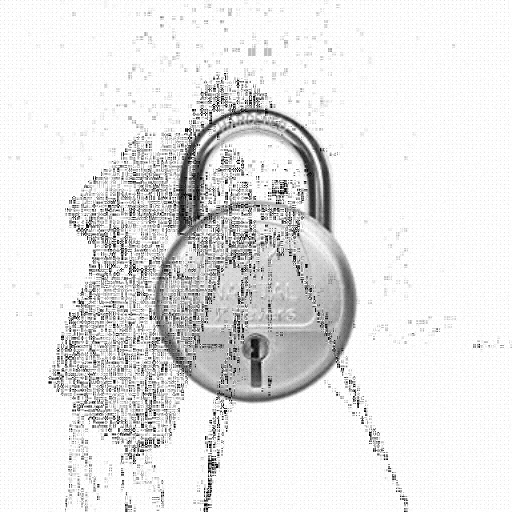

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def extract_svd(watermarked_image, host_image, alpha, block_size=4):
    """
    Extrai uma marca d'água (watermark_image) de uma imagem marcada (watermarked_image)
    usando SVD em blocos.

    NOTA: Este é um método "não-cego" (non-blind) e REQUER a imagem hospedeira
    original para a extração, conforme descrito na fórmula do artigo.
    :param watermarked_image: A imagem marcada.
    :param host_image: A imagem hospedeira ORIGINAL.
    :param alpha: O fator de força usado no embedding.
    :param block_size: O tamanho de bloco usado no embedding.
    :return: A imagem da marca d'água extraída.
    """
    print(f"Iniciando extração SVD em blocos de {block_size}x{block_size}...")

    # Converter imagens para float
    watermarked_image_f = watermarked_image.astype(float)
    host_image_f = host_image.astype(float)

    # Preparar a imagem de saída para a marca d'água
    extracted_watermark = np.zeros_like(host_image_f)

    rows, cols = host_image.shape

    # Iterar sobre a imagem em blocos (deve ser idêntico ao embedding)
    for r in range(0, rows, block_size):
        for c in range(0, cols, block_size):

            # Definir os limites do bloco atual
            r_end = min(r + block_size, rows)
            c_end = min(c + block_size, cols)

            # Obter os blocos da imagem marcada e da hospedeira
            watermarked_block = watermarked_image_f[r:r_end, c:c_end]
            host_block = host_image_f[r:r_end, c:c_end]

            current_block_shape = host_block.shape

            # Calcular SVD de AMBOS os blocos para obter suas matrizes S

            try:
                # Obter S da hospedeira (S)
                U_h, S_h_diag, V_h_T = np.linalg.svd(host_block)
                S_h = np.zeros(current_block_shape, dtype=float)
                k = min(current_block_shape)
                diag_len_h = S_h_diag.shape[0]
                S_h[:k, :k] = np.diag(S_h_diag)

                term_1 = U_h.T @ watermarked_block @ V_h_T.T
                watermarked_block = (term_1 - S_h) / alpha
                extracted_watermark[r:r_end, c:c_end] = watermarked_block

            except np.linalg.LinAlgError:
                # SVD falhou, pular este bloco
                continue


    # Clampar/Truncar valores e converter
    extracted_watermark = np.clip(extracted_watermark, 0, 255)
    extracted_watermark = cv2.normalize(extracted_watermark, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    extracted_watermark = np.uint8(extracted_watermark)

    print("Extração em blocos concluída.")
    return extracted_watermark

extracted_watermark = extract_svd(watermarked_image, host, ALPHA)
print('4 - Marca d\'água Extraída')
cv2_imshow(extracted_watermark)